In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from matplotlib.widgets import Slider, Button, RadioButtons
from IPython.display import HTML

In [2]:
def f(x,lam):
    """
    Logistic map function.
    """
    return lam*x*(1-x)

def nest(f,n,x,lam):
    """
    Takes a function f and applies it to x n times.
    """
    if n == 1:
        return f(x, lam)
    else:
        return f(nest(f,n-1,x, lam),lam)

In [3]:
# Now we consider the interval [1/4, 3/4]
x_val = np.linspace(1/4, 3/4, 1000)
y_val = np.array([nest(f,10,i, 2) for i in x_val])

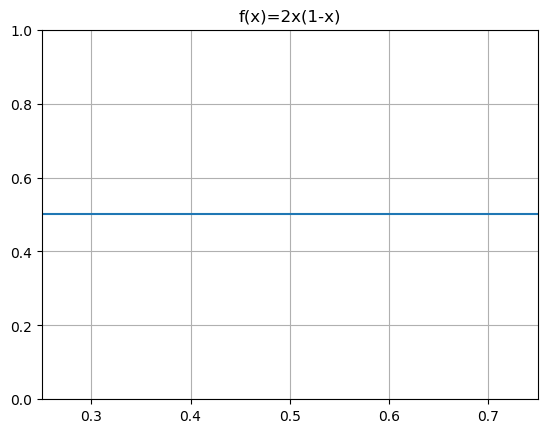

In [4]:
matplotlib.style.use('default')
fig, ax = plt.subplots()
fig.set_tight_layout(False)

ax.set_title("f(x)=2x(1-x)")
ax.set_xlim(1/4,3/4)
ax.set_ylim(0,1)
ax.grid(True)

ax.plot(x_val, y_val)

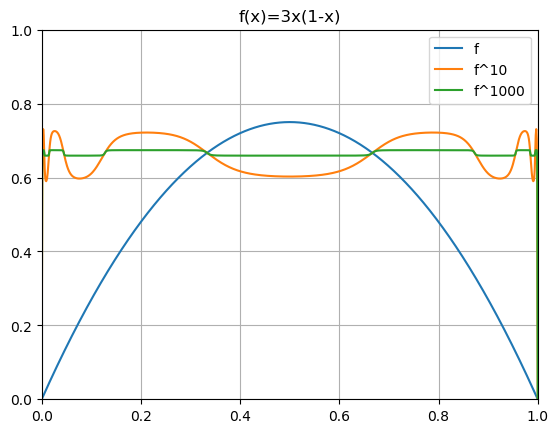

In [5]:
# We now consider the case where lambda = 3 and look at the full unit interval
x_val = np.linspace(0,1,1000)
y_val = np.array([nest(f,1,i,3) for i in x_val])
y_val10 = np.array([nest(f,10,i,3) for i in x_val])
y_val1000 = np.array([nest(f,1000,i, 3) for i in x_val])

matplotlib.style.use('default')
fig, ax = plt.subplots()
fig.set_tight_layout(False)

ax.set_title("f(x)=3x(1-x)")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid(True)

ax.plot(x_val, y_val)
ax.plot(x_val, y_val10)
ax.plot(x_val, y_val1000)
ax.legend(['f', 'f^10', 'f^1000'])

# Exercise 7: Varying Lambda with a Slider

By varying lambda in [2.8,3.2], animate y=f^2(x) together with y=x. Explain the plausible behavior of orbits near the fixed nonzero point.

<IPython.core.display.Javascript object>


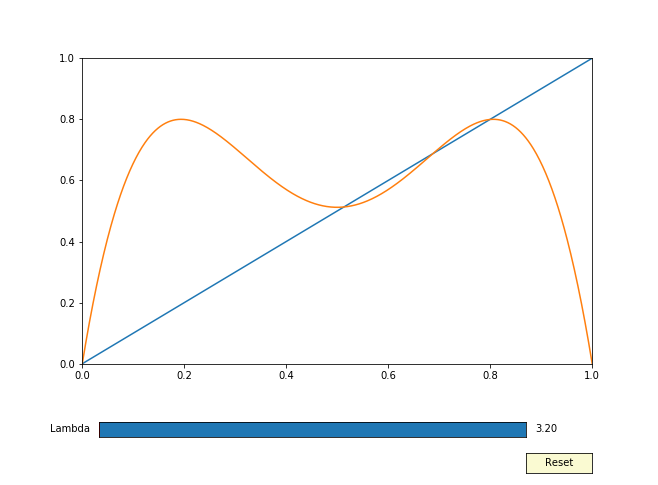

In [15]:
%matplotlib notebook
# first we need to set up our $f(x)$
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
x_val = np.linspace(0, 1, 1000)
lamb0 = 2.8
y_val = np.array([nest(f,2,i,lamb0) for i in x_val])
plt.plot(x_val, x_val)
l, = plt.plot(x_val, y_val)
ax.margins(x=0)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
axcolor= 'lightgoldenrodyellow'
axlamb = plt.axes([0.15, 0.1, 0.65, 0.03], facecolor=axcolor)

slamb = Slider(axlamb, 'Lambda', 2.8, 3.2, valinit=lamb0)

def update(val):
    lamb = slamb.val
    #l.set_ydata(np.array([f(i,lamb) for i in x_val]))
    l.set_ydata(np.array([nest(f, 2, i, lamb) for i in x_val]))
    fig.canvas.draw_idle()

slamb.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    slamb.reset()
button.on_clicked(reset)
        
plt.show()

In [10]:
"""
# I'm killing this because it doesn't work but it could work in the future with some tweaks
# have the radio button change a global variable that determines which function we plot
# the update function would then check what the global variable is and plot from there


%matplotlib notebook
# first we need to set up our $f(x)$
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
x_val = np.linspace(0, 1, 1000)
lamb0 = 2.8
y_val = np.array([f(i, lamb0) for i in x_val])
plt.plot(x_val, x_val)
l, = plt.plot(x_val, y_val)
ax.margins(x=0)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
axcolor= 'lightgoldenrodyellow'
axlamb = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

slamb = Slider(axlamb, 'Lambda', 2.8, 3.2, valinit=lamb0)

#defining radio button here so we can update the slider correctly
rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('f(x)', 'f^2(x)'), active=0)

def plotfunc(label):
    if label == 'f(x)':
        l.set_ydata(np.array([f(i,lamb0) for i in x_val]))
    else:
        l.set_ydata(np.array([nest(f, 2, i, lamb0) for i in x_val]))
    fig.canvas.draw_idle()
radio.on_clicked(plotfunc)

def update(val):
    lamb = slamb.val
    if radio.label == 'f(x)':
        l.set_ydata(np.array([f(i,lamb) for i in x_val]))
    else:
        l.set_ydata(np.array([nest(f, 2, i, lamb) for i in x_val]))
    fig.canvas.draw_idle()

slamb.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    slamb.reset()
button.on_clicked(reset)
        
plt.show()
"""

"\n# I'm killing this because it doesn't work but it could work in the future with some tweaks\n# have the radio button change a global variable that determines which function we plot\n# the update function would then check what the global variable is and plot from there\n\n\n%matplotlib notebook\n# first we need to set up our $f(x)$\nfig, ax = plt.subplots()\nplt.subplots_adjust(left=0.25, bottom=0.25)\nx_val = np.linspace(0, 1, 1000)\nlamb0 = 2.8\ny_val = np.array([f(i, lamb0) for i in x_val])\nplt.plot(x_val, x_val)\nl, = plt.plot(x_val, y_val)\nax.margins(x=0)\n\nax.set_xlim(0,1)\nax.set_ylim(0,1)\naxcolor= 'lightgoldenrodyellow'\naxlamb = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)\n\nslamb = Slider(axlamb, 'Lambda', 2.8, 3.2, valinit=lamb0)\n\n#defining radio button here so we can update the slider correctly\nrax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)\nradio = RadioButtons(rax, ('f(x)', 'f^2(x)'), active=0)\n\ndef plotfunc(label):\n    if label == 'f(x)'